In [1]:
%cd "/home/andrei/Data/HeteroR/test_dir/GRF"

/home/andrei/Data/HeteroR/test_dir/GRF


Now I have some results of repeats analysis in DA62886 strain.

There are 55 resistance genes and 55 ranges of length 190 kbp to 204 kbp.

with the following settings (minimal repeat length 10 bp, no mismatches) GRF has found 1.4 million repeats

`grf-main -i regions_output.fasta -c 2 -o DA62886_perfect_repeats_GRF_test -t 10 --min_tr 10 -f 1 --max_mismatch
0 --seed_mismatch 0 --max_space 204000 --min_space 500`

Distribution of the repeats' lengths:

In [2]:
grf_results_file = "DA62886_perfect_repeats_GRF_test/perfect.spacer.id"
with open(grf_results_file) as f:
    output_lines = [line.rstrip() for line in f.readlines()]

len(output_lines)

1456407

In [3]:
repeat_lengths = [int(item.split(":")[-1][:-1]) for item in output_lines]

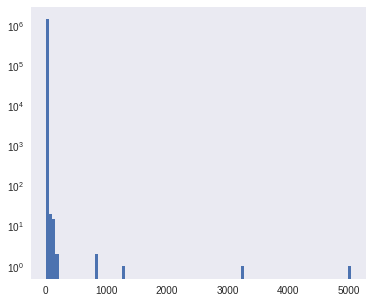

In [19]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [6,5]
plt.hist(repeat_lengths, bins=100)
plt.yscale("log")
#plt.xscale("log", base=2)
plt.grid()

plt.show()

In [38]:
import matplotlib
matplotlib.use('Agg')
plt.savefig("/home/andrei/Data/HeteroR/test_dir/GRF/DA62886_repeat_length_histogram.png")

<Figure size 432x360 with 0 Axes>

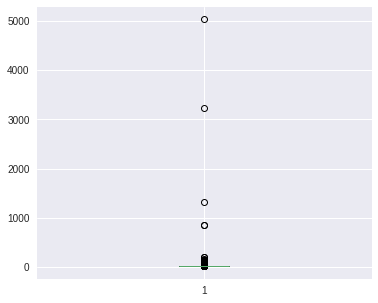

In [6]:
plt_boxplot = plt.boxplot(repeat_lengths)
plt.show()

In [35]:
import pandas as pd

repeat_lengths_df = pd.DataFrame({"n": repeat_lengths})

sorted(repeat_lengths_df["n"].unique())


[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 40,
 41,
 43,
 45,
 47,
 50,
 51,
 56,
 60,
 61,
 68,
 83,
 84,
 94,
 101,
 110,
 129,
 136,
 143,
 152,
 201,
 860,
 1311,
 3227,
 5035]

In [ ]:
repeat_lengths_df.groupby("m")
